<a href="https://colab.research.google.com/github/missakaherath/Titanic-Machine-Learning-from-Disaster---Kaggle/blob/main/getting_started_with_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

"""Create a function to plot a variable's absolute and relative frequency."""
def plotFrequency(variable):
    """Plots absolute and relative frequency of a variable."""
    
    # Calculates absolute frequency
    absFreq = variable.value_counts()
    
    # Calculates relative frequency
    relFreq = variable.value_counts(normalize=True).round(4)*100
    
    # Creates a dataframe off absolute and relative frequency
    df = pd.DataFrame({
        "absoluteFrequency":absFreq,
        "relativeFrequency":relFreq
    })
    
    # Create two subplots of bar chart
    fig=make_subplots(
        rows=1, 
        cols=2,
        vertical_spacing=0.3,
        subplot_titles=("Absolute Frequency", "Relative Frequency"),
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for absolute frequency
    fig.add_trace(
        go.Bar(
        y=df.index, 
        x=df.absoluteFrequency,
        orientation="h",
        text=df.absoluteFrequency,
        hoverinfo="x+y",
        textposition="auto", 
        name="Abs Freq",
        textfont=dict(family="sans serif",size=14),
        marker = dict(color=df.absoluteFrequency, colorscale="Rainbow")),
        row=1,
        col=1
        )

    # Add another trace for relative frequency
    fig.add_trace(
        go.Bar(y=df.index,
        x=df.relativeFrequency.round(2),
        orientation="h",
        text=df.relativeFrequency.round(2),
        hoverinfo="x+y",
        textposition="auto", 
        name="Rel Freq(%)",
        textfont=dict(family="sans serif",size=15),
        marker=dict(color=df.relativeFrequency.round(2), colorscale="Rainbow")),
        row=1,
        col=2
        )

    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=970,
        hovermode="closest",
        title_text=f"Absolute and Relative Frequency of {variable.name}",showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis title in bold
    fig.layout.yaxis1.update(title=f"<b>{variable.name}</b>")
    
    # Set x-axes titles in bold
    fig.layout.xaxis1.update(title="<b>Abs Freq</b>")
    fig.layout.xaxis2.update(title="<b>Rel Freq(%)</b>")
    # or, fig["layout"]["xaxis2"].update(title="<b>Rel Freq(%)</b>")
    return fig.show()

'Train ,'

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
K      1
Name: processedCabin, dtype: int64

'Test ,'

X    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: processedCabin, dtype: int64

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



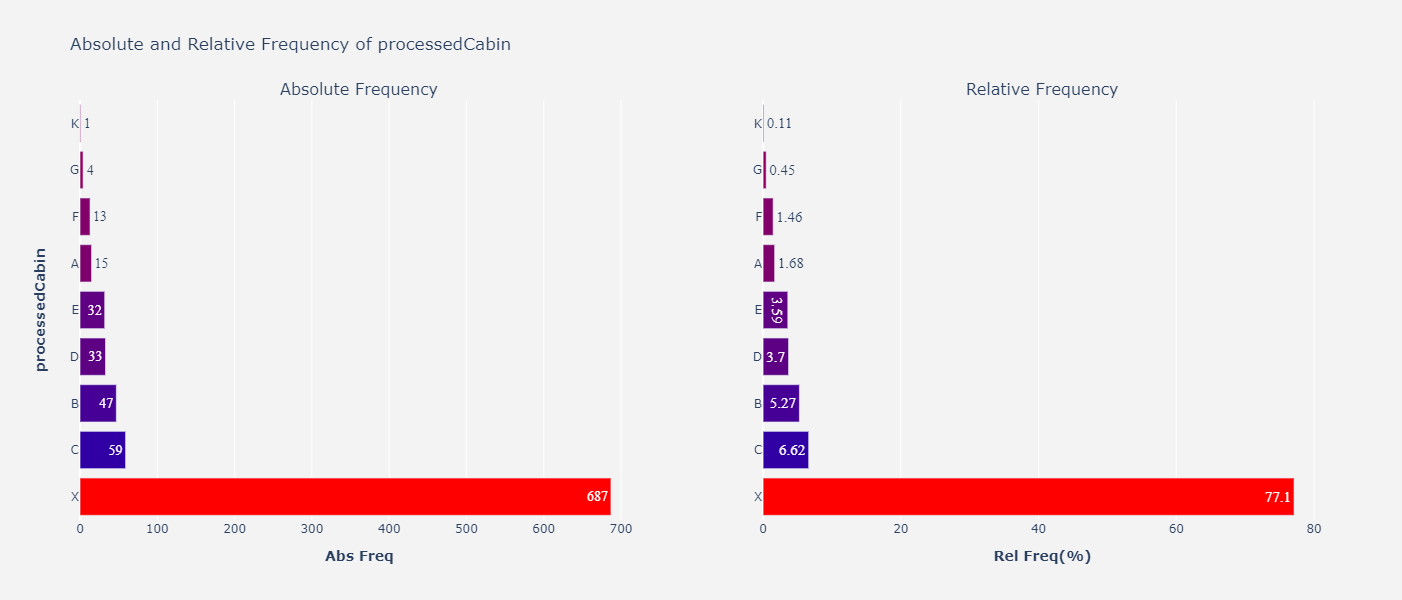

In [ ]:
#apply feature engineering to cabins

#display(train_data.Cabin)

#replace Nan values in cabins
replaceNanTrain = train_data.Cabin.fillna("X")
replaceNanTest = test_data.Cabin.fillna("X")

#replace cabin values by its first char
train_data["processedCabin"] = replaceNanTrain.str.get(0)
test_data["processedCabin"] = replaceNanTest.str.get(0)

#since cabins "T", "U", "W", "X", "Y", & "Z" were in the same deck they can be put into a same bucket
train_data.processedCabin.replace(to_replace = ["T", "U", "W", "Y","Z"], value = "K", inplace = True)
test_data.processedCabin.replace(to_replace = ["T", "U", "W", "Y","Z"], value = "K", inplace = True)

#test_data["processedCabin"].merge(train_data["processedCabin"], how='outer')

#test_data["processedCabin"].add(train_data["processedCabin"])

display("Train ,", train_data.processedCabin.value_counts())
display("Test ,",test_data.processedCabin.value_counts())

plotFrequency(train_data["processedCabin"])

In [ ]:
#extraxt first names
firstNameTrain = train_data.Name.str.split(".").str.get(0).str.split(",").str.get(-1)
firstNameTest = test_data.Name.str.split(".").str.get(0).str.split(",").str.get(-1)

'''display(firstNameTrain.value_counts())
display(firstNameTest.value_counts())'''

#creating buckets and add titles to them
#officer bucket
firstNameTrain.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)
firstNameTest.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)

#Aristocrat bucket
firstNameTrain.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)
firstNameTest.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)

firstNameTrain.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)
firstNameTest.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

firstNameTrain.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)
firstNameTest.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

train_data["titleNameProcessed"] = firstNameTrain
test_data["titleNameProcessed"] = firstNameTest

display(train_data.titleNameProcessed.value_counts())
display(test_data.titleNameProcessed.value_counts())

 Mr            517
 Miss          185
 Mrs           126
 Master         40
 Officer        18
 Aristocrat      5
Name: titleNameProcessed, dtype: int64

 Mr            240
 Miss           79
 Mrs            72
 Master         21
 Officer         5
 Aristocrat      1
Name: titleNameProcessed, dtype: int64

0       small
1       small
2      single
3       small
4      single
        ...  
886    single
887    single
888    medium
889    single
890    single
Name: familySize, Length: 891, dtype: object

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



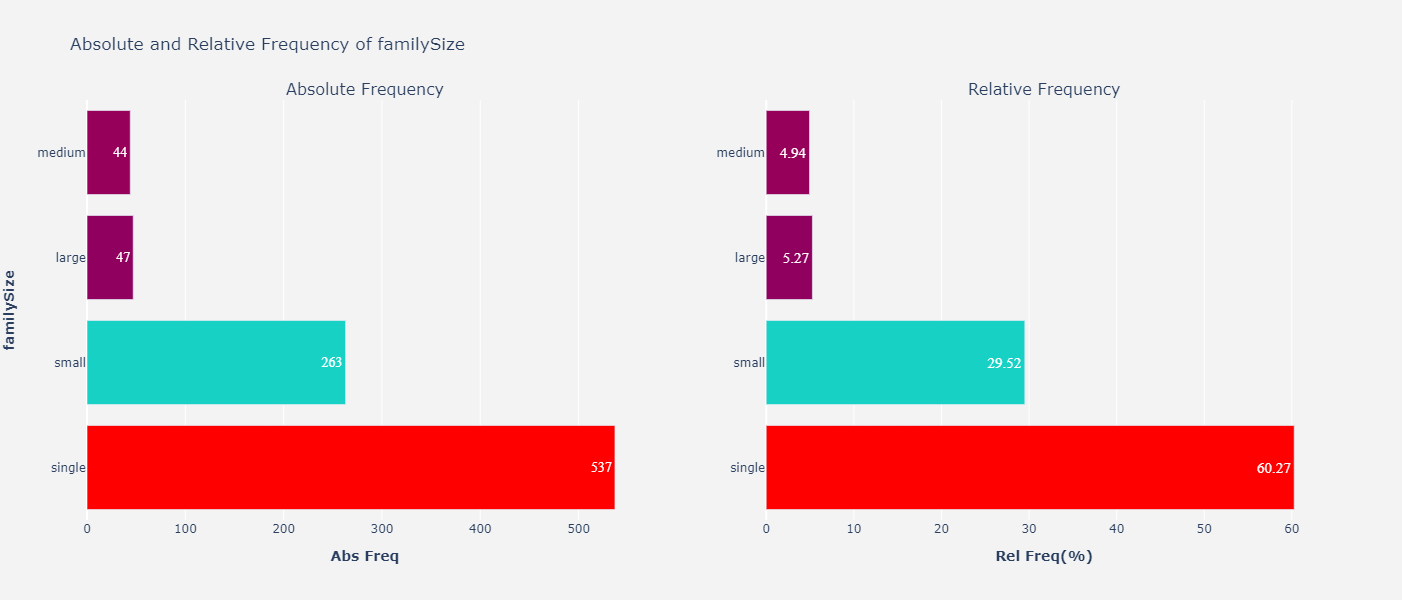

In [ ]:
train_data["familySize"] = train_data.SibSp + train_data.Parch + 1
test_data["familySize"] = train_data.SibSp + train_data.Parch + 1

#display(train_data.familySize)

#creating buckets for single, small, medium and large sized families
train_data.familySize.replace(to_replace = [1], value = "single", inplace = True)
train_data.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
train_data.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
train_data.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

test_data.familySize.replace(to_replace = [1], value = "single", inplace = True)
test_data.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
test_data.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
test_data.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

display(train_data.familySize)

plotFrequency(train_data["familySize"])

In [ ]:
#impute missing values of Age col
train_data.Age = train_data.groupby(["titleNameProcessed", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
display(train_data.isna().sum()[train_data.isna().sum()>0])

Cabin       687
Embarked      2
dtype: int64

'train'

Adult      563
Young      235
Child       77
Senior      11
Garbage      3
0.83         2
Name: ageGroup, dtype: int64

'test'

Adult      199
Young      100
Child       27
Garbage      3
Senior       2
0.83         1
Name: ageGroup, dtype: int64

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



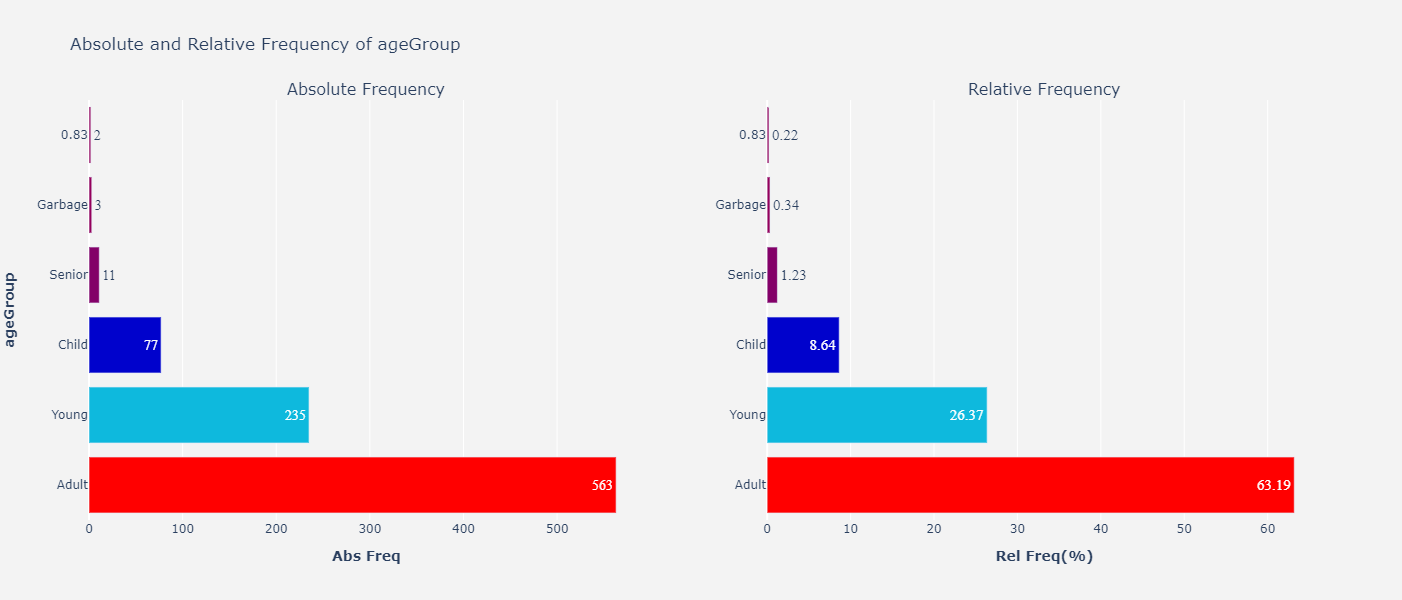

In [ ]:
train_data["ageGroup"] = train_data.Age
test_data["ageGroup"] = test_data.Age

#display(np.arange(0, 15, 1).tolist())

train_data.ageGroup.replace(to_replace = np.arange(0, 15, 0.25).tolist(), value = "Child", inplace = True)
train_data.ageGroup.replace(to_replace = np.arange(15, 25, 0.25).tolist(), value = "Young", inplace = True)
train_data.ageGroup.replace(to_replace = np.arange(25, 65, 0.25).tolist(), value = "Adult", inplace = True)
train_data.ageGroup.replace(to_replace = np.arange(65, 100, 0.25).tolist(), value = "Senior", inplace = True)
train_data.ageGroup.replace(to_replace = np.arange(0, 1, 0.01).tolist(), value = "Garbage", inplace = True)

test_data.ageGroup.replace(to_replace = np.arange(0, 15, 0.25).tolist(), value = "Child", inplace = True)
test_data.ageGroup.replace(to_replace = np.arange(15, 25,0.25).tolist(), value = "Young", inplace = True)
test_data.ageGroup.replace(to_replace = np.arange(25, 65, 0.25).tolist(), value = "Adult", inplace = True)
test_data.ageGroup.replace(to_replace = np.arange(65, 100, 0.25).tolist(), value = "Senior", inplace = True)
test_data.ageGroup.replace(to_replace = np.arange(0, 1, 0.01).tolist(), value = "Garbage", inplace = True)

display("train", train_data.ageGroup.value_counts())
display("test",test_data.ageGroup.value_counts())

plotFrequency(train_data["ageGroup"])

In [ ]:
display(train_data.isna().sum()[train_data.isna().sum()>0])
#display(print(np.arange(0, 15, 0.25).tolist()))

Cabin       687
Embarked      2
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch", "processedCabin"
#features = ["Pclass", "Sex", "SibSp", "Parch", "titleNameProcessed"]
features = ["Pclass", "Sex", "familySize", "titleNameProcessed", "ageGroup"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

display(X)
display(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':predictions})
output.to_csv('my_submission.csv', index=False)
print("Submission was successfully saved!")

,Pclass,Sex_female,Sex_male,familySize_large,familySize_medium,familySize_single,familySize_small,titleNameProcessed_ Aristocrat,titleNameProcessed_ Master,titleNameProcessed_ Miss,titleNameProcessed_ Mr,titleNameProcessed_ Mrs,titleNameProcessed_ Officer,ageGroup_0.83,ageGroup_Adult,ageGroup_Child,ageGroup_Garbage,ageGroup_Senior,ageGroup_Young
0,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,3,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
887,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
888,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
889,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


,Pclass,Sex_female,Sex_male,familySize_large,familySize_medium,familySize_single,familySize_small,titleNameProcessed_ Aristocrat,titleNameProcessed_ Master,titleNameProcessed_ Miss,titleNameProcessed_ Mr,titleNameProcessed_ Mrs,titleNameProcessed_ Officer,ageGroup_0.83,ageGroup_Adult,ageGroup_Child,ageGroup_Garbage,ageGroup_Senior,ageGroup_Young
0,3,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,3,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,3,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
414,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
415,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
416,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


Submission was successfully saved!
